# Kenngrößen von zeitlich veränderlichen Signalen

Im Folgenden werden einige zeitlich veränderliche Signale und deren -parameter beschrieben. Sie können dieses Notebook selbst interaktiv verändern. Dafür gibt es zwei Möglichkeiten: 
- Sie geben die URL in https://nbviewer.jupyter.org/ ein
- Sie installieren python, z. B. mit der Distribution anaconda (wichtig: python Version 3.x) und öffnen dieses jupyter notebook auf Ihrem Rechner mit jupyter.

Die hier vorgestellten Parameter gelten für alle Arten von zeitlich veränderlichen Signalen $x(t)$. Sowohl Spannungen können zeitlich veränderlich sein, als auch Ströme (und z. B. auch Temperaturen und ganz viele weitere physikalische Werte). Im Folgenden ist nun beispielhaft ein **Stromsignal** $i(t)$ dargestellt und alle Kennwerte werden ermittelt. Die Kennwerte für ein Spannungssignal lassen sich auf dieselbe Art ermitteln.

In [1]:
# Importieren der notwendigen Libraries für den folgenden Code
import numpy as np
import matplotlib.pyplot as plt
# Einstellen von Grafikparametern
plt.style.use('classic')
fs=24
plt.rcParams.update({'font.size':fs})

## Erzeugung eines zeitveränderlichen Signals

Wir erzeugen nun ein zeitlich veränderliches Stromsignal, wie es z. B. gemessen werden könnte von einem elektronischen Gerät.

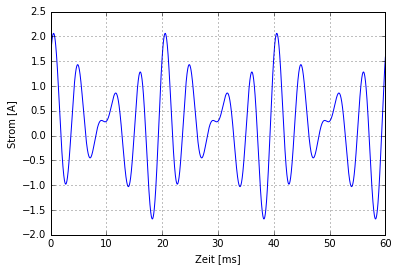

In [2]:
# Zeitbereich von 0 bis 60 ms in 100000 Schritten
t = np.linspace(0,60e-3,100000)
# Grundfrequenz in Hertz
f = 50
# Phasenverschiebungen der Schwingungsanteile
phi0 = np.pi/2
phi1 = np.pi/3
phi2 = np.pi/4
phi3 = np.pi/5
# Gleichanteil = DC-Offset
iDC = .2*np.ones(len(t)) # 0,2 Ampere Offset
# Wechselanteil bei 50 Hz
i50 = .2*np.cos(2*np.pi*f*t - phi0)
# ausgewählte Oberschwingungen
i100 = .2*np.cos(2*np.pi*2*f*t - phi1)
i200 = .9*np.cos(2*np.pi*4*f*t - phi2)
i250 = .8*np.cos(2*np.pi*5*f*t - phi3)
# Summe
i = iDC + i50 + i100 + i200 + i250
plt.plot(1000*t,i)
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.grid()

## Periodendauer $T$

Bei der Erstellung des Signals haben wir die Grundfrequenz $f$ verwendet. Nach einer Periodenlänge $T$ wiederholt sich das Signal. 

$T = 1/f$

Um die Periodendauer zu ermitteln, nimmt man sich einen markanten Punkt, z. B. einen Spitzenwert und sieht sich an, wie lange das Signal benötigt, um wieder diesen Spitzenwert zu erreichen. Dann kontrolliert man noch, ob das Signal, danach den gleichen Verlauf hat, wie davor. Falls dies der Fall ist, hat man die Periodendauer $T$ gefunden.

In [3]:
# Spitzenwert des Stroms ermitteln
imax = np.max(i)
print(str(imax),'A')

2.0613303180740643 A


In [4]:
# ersten Zeitpunkt mit Spitzenwert ermitteln
tmax = t[np.argmax(i)]
print(str(1000*tmax),'ms')

40.5370053700537 ms


In [5]:
# zweiten Zeitpunkt mit Spitzenwert ermitteln
tmax2 = tmax + 1/f
print(str(1000*tmax2),'ms')

60.5370053700537 ms


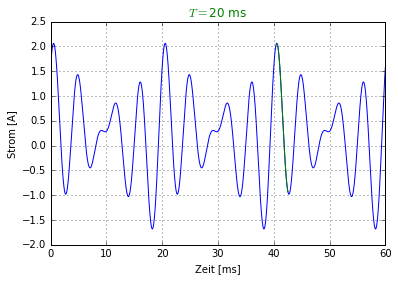

In [6]:
# nur eine Periode
tT = t[np.argmax(i):np.argmax(i)+int(np.round(10000/3))]
iT = i[np.argmax(i):np.argmax(i)+int(np.round(10000/3))]
# im Diagramm überprüfen
plt.plot(1000*t,i)
plt.plot(1000*tT,iT)
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.title('$T=$20 ms',color='green')
plt.grid()

## Frequenz $f$

Wenn man die Periodendauer aus dem Diagramm bestimmt, weil man das Signal z. B. durch Messen ermittelt hat, kann man die Frequenz daraus bestimmen. Wir sehen hier $T=20$ ms.

In [7]:
T = 20e-3 # 20 ms
print('f=',1/T,'Hz')

f= 50.0 Hz


## Scheitelwert $i_S$

Der Scheitelwert ist der Betrag des Maximalwertes des Signals. 

In [8]:
print('i_S = ',np.max(np.abs(i)),'A')

i_S =  2.0613303180740643 A


## Amplitude $\hat{i}$

Das Signal oszilliert (schwingt) um einen Mittelwert $\bar{i}$ herum. 

In [9]:
print('Mittelwert:',np.mean(i),'A')

Mittelwert: 0.2000138360969855 A


In [10]:
print('Amplitude:',np.max(i)-np.mean(i),'A')

Amplitude: 1.8613164819770789 A


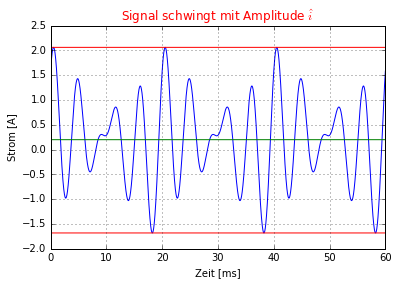

In [11]:
# im Diagramm überprüfen
plt.plot(1000*t,i)
plt.plot(1000*t,np.mean(i)*np.ones(len(t)))
plt.plot(1000*t,np.max(i)*np.ones(len(t)),'r-')
plt.plot(1000*t,np.min(i)*np.ones(len(t)),'r-')
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.title('Signal schwingt mit Amplitude $\hat{i}$',color='red')
plt.grid()

## Spitze-Spitze-Wert $i_{pp}$

Der Spitze-Spitze-Wert gibt an, wie weit das Signal insgesamt schwingt. Wenn die Amplitude bekannt ist, kann man ihn aus $i_{pp}=2\hat{i}$ bestimmen. Allgemein gilt: 
$i_{pp}=|i_{max}-i_{min}|$

In [12]:
print('Spitze-Spitze-Wert:', np.abs(np.max(i)-np.min(i)),'A')

Spitze-Spitze-Wert: 3.7418412097581877 A


In [13]:
# überprüfen, ob das dem Zweifachen der Amplitude gleicht
print('doppelte Amplitude:', 2*(np.max(i)-np.mean(i)),'A')

doppelte Amplitude: 3.7226329639541578 A


## Gleichwert oder Mittelwert $\bar{i}$

Python kennt eine Funktion, um den Mittelwert eines Signals zu bestimmen: `np.mean()`. Hier in diesem Beispiel hat sie bisher gut funktioniert, denn wir haben genau drei Perioden eines Signals vorliegen. Wenn man davon den Mittelwert bestimmt, dann ergibt sich auch der Mittelwert des Signals. Hätten wir z. B. nur eineinhalb Perioden vorliegen, würde sich ein falscher Mittelwert ergeben: 

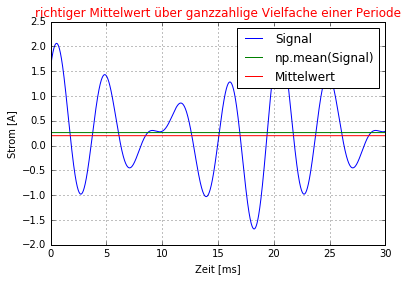

In [14]:
# eineinhalb Perioden
tkurz = t[:50000]
ikurz = i[:50000]
# Mittelwert davon
ikurzmean = np.mean(ikurz)
# im Diagramm überprüfen
plt.plot(1000*tkurz,ikurz,label='Signal')
plt.plot(1000*tkurz,ikurzmean*np.ones(len(tkurz)),label='np.mean(Signal)')
plt.plot(1000*tkurz,np.mean(i)*np.ones(len(tkurz)),label='Mittelwert')
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.title('richtiger Mittelwert über ganzzahlige Vielfache einer Periode', color='red')
plt.grid()
plt.legend()

Um den Mittelwert bei einem formelmäßig bekannten Signal zu ermitteln, muss man also über ein **ganzzahliges Vielfaches** der Periodendauer mitteln.

$\bar{i}=\frac{1}{T}\int_0^T i(t)dt$

$\bar{i} =\frac{1}{nT}\int_0^{nT} i(t)dt$

Bei Signalen, deren Periode nicht so genau ermittelbar ist, empfiehlt es sich, über einen möglichst langen Zeitraum zu mitteln, so dass möglichst viele Perioden gemittelt werden: 

$\bar{i}=\lim_{T\to\infty}\frac{1}{T}\int_0^T i(t)dt$

Bei unserem kurzen Signal würde das nichts helfen, da es ja nur eineinhalb Perioden dauert. Daher ist es besser, nur eine Periode für die Mittelung zu verwenden.

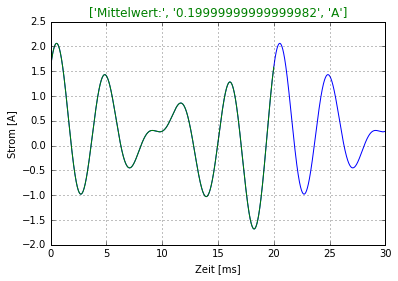

In [15]:
# Periodendauer
T = 1/f
indT = np.where(np.isclose(t, T))
indT = indT[0]
# Signal der Periodendauer
tPeriode = tkurz[:indT[0]]
iPeriode = ikurz[:indT[0]]
# im Diagramm überprüfen
plt.plot(1000*tkurz,ikurz)
plt.plot(1000*tPeriode,iPeriode)
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.title(['Mittelwert:',str(np.mean(iPeriode)),'A'],color='green')
plt.grid()

## Gleichrichtwert $|\bar{i}|$

Wenn eine ideale Diode nur positive Ströme durchlässt, dann entsteht als Mittelwert der sog. Gleichrichtwert - **nicht verwechseln mit dem Gleichwert**!

$|\bar{i}| = \frac{1}{T}\int_0^T |i| dt$

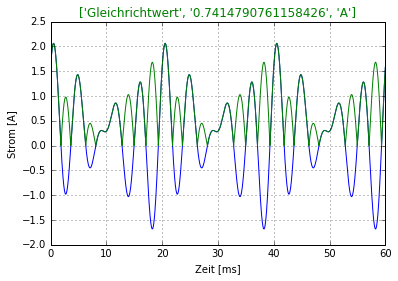

In [16]:
# gleichgerichtetes Signal
igleich = np.abs(i)
# im Diagramm überprüfen
plt.plot(1000*t,i)
plt.plot(1000*t,igleich)
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
plt.title(['Gleichrichtwert',str(np.mean(np.abs(i))),'A'],color='green')
plt.grid()

Im Diagramm sieht man einmal das Originalsignal in blau und dann das durch Betrag quasi nach oben geklappte grüne Signal. Der Mittelwert des grünen Signals ist der Gleichrichtwert.

## Effektivwert $I$

Der Effektivwert ist der quadratische Mittelwert eines Signals, engl. root mean square, kurz RMS. 

$I_{eff}=I=\sqrt{\frac{1}{T}\int_0^T i^2(t)dt}$

Wieder ist wichtig, dass man über eine Periode oder über Vielfache einer Periode mittelt (siehe Mittelwert). Dann lässt sich der Effektivwert auch einfach bestimmen: 

In [17]:
print('Effektivwert',str(np.sqrt(np.mean(i**2))),'A')

Effektivwert 0.8972274116391971 A


Der Effektivwert lässt sich ebenfalls ermitteln, wenn man die Effektivwerte der einzelnen Signalanteile kennt. Er kann auch als quadratisches Mittel aus den einzelnen Signalanteilen bestimmmt werden:

$I = \sqrt{\sum_{k=0}^n I_k^2}$

Dabei setzt sich das Signal aus dem Gleichanteil $I_0=I_{DC}$, der Grundschwingung bei der Frequenz $f$ mit dem Effektivwert $I_1$, der nächsten Oberschwingung mit der Frequenz $2f$ und dem Effektivwert $I_2$ und den weiteren Anteilen zusammen. 

Bei unserem Signal, das wir oben ja selbst zusammengesetzt haben, sieht das so aus: 

In [18]:
print('Gleichanteil I_0=I_{DC}=',iDC[0],'A')
print('Grundschwingung I_1=',np.sqrt(np.mean(i50**2)),'A')
print('I_2=',np.sqrt(np.mean(i100**2)),'A')
print('I_3=',0,'A')
print('I_4=',np.sqrt(np.mean(i200**2)),'A')
print('I_5=',np.sqrt(np.mean(i250**2)),'A')

Gleichanteil I_0=I_{DC}= 0.2 A
Grundschwingung I_1= 0.14142064912876054 A
I_2= 0.141421002683477 A
I_3= 0 A
I_4= 0.6363961030678927 A
I_5= 0.5656862989806117 A


Nun können wir diese Werte zusammenrechnen im Gesamteffektivwert mit der obigen Formel und erhalten: 

In [19]:
# Einzelwerte
I0=iDC[0]
I1=np.sqrt(np.mean(i50**2))
I2=np.sqrt(np.mean(i100**2))
I3=0
I4=np.sqrt(np.mean(i200**2))
I5=np.sqrt(np.mean(i250**2))
print('Effektivwert aus quadratischem Mittelwert der einzelnen Effektivwerte:', np.sqrt(I0**2+I1**2+I2**2+I3**2+I4**2+I5**2),'A')

Effektivwert aus quadratischem Mittelwert der einzelnen Effektivwerte: 0.8972183061297746 A


Das ist ein ziemlich praktischer Zusammenhang, wenn man wissen will, wie stark sich ein Widerstand erwärmt, der von einem sinusförmigen Strom mit Effektivwert $I_{AC}$ plus **Gleichanteil** $I_{DC}$ durchflossen wird. Dann kann man nämlich den Effektivwert des gesamten Stroms folgendermaßen bestimmen: 

$I=\sqrt{I_{DC}^2+I_{AC}^2}$

Die gesamte Heizleistung ergibt sich dann zu $P=I^2 R$

## Scheitelfaktor $k_S$

Der Scheitelfaktor $k_S$ zeigt auf, wie sehr sich der Maximalwert (Scheitelwert) eines Signals und der Effektivwert voneinander unterscheiden. Bei unserem Beispielsignal ergibt sich: 

In [20]:
print('Scheitelfaktor:', np.max(i)/np.sqrt(np.mean(i**2)))

Scheitelfaktor: 2.297444651527197


Für ein reines Gleichstromsignal zeigt sich:

In [21]:
print('Scheitelfaktor DC-Signal:', np.max(iDC)/np.sqrt(np.mean(iDC**2)))

Scheitelfaktor DC-Signal: 0.9999999999999998


Das ist 1, wenn es keine numerischen Ungenauigkeiten gibt.

Ein **Sinussignal oder Cosinussignal** hat einen Scheitelfaktor von:

In [22]:
print('Scheitelfaktor Sinussignal:', np.max(i50)/np.sqrt(np.mean(i50**2)))

Scheitelfaktor Sinussignal: 1.4142206319236568


In [23]:
print('Das ist gleich Wurzel 2=', np.sqrt(2))

Das ist gleich Wurzel 2= 1.4142135623730951


Wenn wir also einen Scheitelfaktor $k_S>\sqrt{2}$ sehen, haben wir es mit Oberschwingungen zu tun.

## Kreisfrequenz $\omega$

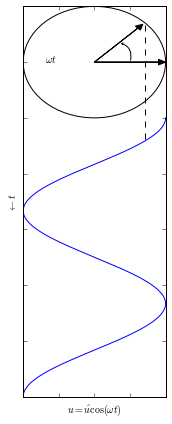

In [24]:
# noch eine Bibliothek
import matplotlib.lines as mlines
# noch eine Grafikeinstellung
plt.rcParams.update({'figure.autolayout': True})

# Diagrammwerte
tk=np.linspace(3e-3,10e-3,1)
fk=300
uk=np.cos(2*np.pi*fk*tk+np.pi)
t1=np.linspace(5e-3,10e-3,1000)
u1=np.cos(2*np.pi*fk*t1+np.pi)

plt.figure(figsize=(2.5,6))

hw=.1
hl=.1
x2,y2=.5,-5
x1,y1=.35,-4.65

ax1 = plt.subplot(111)
plt.plot(-uk,-1000*tk-1,'w-')
circle1 = plt.Circle((0, -5), 1, edgecolor='k',facecolor='w',clip_on=True)
plt.plot(u1,-1000*t1-1)
ax1.add_artist(circle1)
ax1.arrow(0,-5,1-hl,0,head_width=hw,head_length=hl,fc='k')
ax1.arrow(0,-5,.71-hl,.71-hl,head_width=hw,head_length=hl,fc='k')
ax1.annotate("",xy=(x1,y1),xycoords='data',xytext=(x2,y2),textcoords='data',arrowprops=dict(arrowstyle="->,head_width=.1,head_length=.1",color='k',patchA=None,patchB=None,connectionstyle="arc3,rad=.5",),)
ax1.plot([1,1],[-5,-6],'k--')
ax1.plot([.71,.71],[-4.33,-6.42],'k--')
ax1.text(-.7,-5,'$\omega t$')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.setp(ax1.get_yticklabels(),visible=False)
plt.ylabel('$\leftarrow t$')
plt.xlabel('$u=\hat{u}\cos(\omega t) $')

plt.tight_layout()

Betrachtet man einen Zeiger, der mit einer konstanten Geschwindigkeit in einem Kreis rotiert, wie in dem Diagramm gezeigt, so kann man seine x-Auslenkung als Cosinusfunktion darstellen. Wenn der Zeiger in der Periodendauer $T$ einmal um den Kreis herum kommt, dann legt er auf dem Einheitskreis mit Radius 1 einen Weg von $2\pi$ zurück. Die Frequenz der Umdrehung ist $f$ und die sog. Kreisfrequenz, die den Weg auf dem Einheitskreis mit einbezieht beträgt dann:

$\omega=2\pi f$

In [25]:
print('Frequenz',f,'Hz')
print('Kreisfrequenz:',2*np.pi*f,'Hz')

Frequenz 50 Hz
Kreisfrequenz: 314.1592653589793 Hz


Das heißt, dass eine Cosinusfunktion interpretiert werden kann, als die Auslenkung in x-Richtung eines rotierenden Zeigers. 

## Nullphasenwinkel $\varphi_i$

Der Zeiger beginnt nicht unbedingt so wie im Diagramm dargestellt so zu rotieren, dass der Cosinus den Wert 1 bei der Zeit 0 hat. Er kann auch zu einem beliebigen anderen Zeitpunkt beginnen. Anders gesagt, kann das Cosinussignal zeitlich früher oder später beginnen. Der Parameter, der diese Verschiebung beschreibt, ist der Nullphasenwinkel $\varphi_i$ des Signals $i(t)$.

Nehmen wir ein einfaches Cosinussignal wie das der Grundschwingung aus unserem Beispiel. Nun bestimmen wir aus dem Diagramm den Nullphasenwinkel, indem wir mit einem Cosinussignal vergleichen, das zum Zeitpunkt 0 den maximalen Wert hat. 

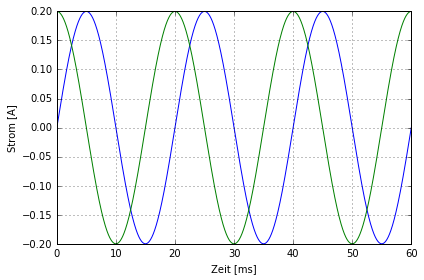

In [26]:
# Amplitude des Grundschwingungssignals
i50amp = np.max(i50)
# Cosinussignal ohne Phasenverschiebung mit dieser Amplitude
i50null = i50amp*np.cos(2*np.pi*f*t)
# im Diagramm überprüfen
plt.plot(1000*t,i50)
plt.plot(1000*t,i50null)
plt.xlabel('Zeit [ms]')
plt.ylabel('Strom [A]')
#plt.title(['Gleichrichtwert',str(np.mean(np.abs(i))),'A'],color='green')
plt.grid()

Ein guter Vergleichspunkt sind die Nulldurchgänge. Wichtig ist, dass die Signalrichtung der beiden verglichenen Nulldurchgänge gleich ist. Hier wollen wir zwei steigende Flanken beim Nulldurchgang vergleichen.

In [27]:
# Indizes des blauen Signals (mit Phasenverschiebung)
zero_crossings50 = np.where(np.diff(np.sign(i50)))
print('zweiter Nulldurchgang blau mit steigender Flanke nach',1000*t[zero_crossings50[0][1]],'ms')
# Indizes des grünen Signals (ohne Phasenverschiebung)
zero_crossings50null = np.where(np.diff(np.sign(i50null)))
print('zweiter Nulldurchgang grün mit steigender Flanke nach',1000*t[zero_crossings50null[0][1]],'ms')
# Zeitdifferenz
deltazeit = t[zero_crossings50[0][1]]-t[zero_crossings50null[0][1]]
print('Zeitdifferenz',1000*deltazeit,'ms')
# bezogen auf Kreis mit 2pi Strecke für die gesamte Periode
phi50null = 2*np.pi*deltazeit*f
print('Nullphasenwinkel',phi50null,'rad =',phi50null*180/np.pi,'°')

zweiter Nulldurchgang blau mit steigender Flanke nach 20.0 ms
zweiter Nulldurchgang grün mit steigender Flanke nach 14.999549995499954 ms
Zeitdifferenz 5.000450004500046 ms
Nullphasenwinkel 1.5709376998780393 rad = 90.00810008100085 °


Der Nullphasenwinkel beträgt $+\pi/2$.

Wichtiger ist es meist, die Phasen**differenz** zwischen Spannung und Strom zu ermitteln. Dies geschieht auf dieselbe Weise. Da sie meist nicht die gleiche Form haben, sind die Nulldurchgänge hilfreich beim Ablesen.